In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/titanic/data/internal_train_data_1226_encoded.csv'
train = pd.read_csv(file_path, low_memory=False)

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Mapped_Title,FamilySize,TicketPrefix,...,TicketNumberLengthGroup,TicketNumberPrefix,Mapped_Sex,AgeGroup,Age_Pclass_Group,FareGroup,FamilySizeGroup,Age_Pclass,family_size_pclass_total,family_size_pclass_survived
0,0,1,45.5,0,0,28.5000,2,0,1,35,...,3,68,0,2,6,3,0,45.5,109,0.536585
1,0,2,23.0,0,0,13.0000,2,0,1,35,...,1,55,0,0,1,1,0,46.0,104,0.364706
2,0,3,32.0,0,0,7.9250,2,0,1,33,...,2,84,0,1,5,0,0,96.0,324,0.213740
3,0,3,26.0,1,0,7.8542,2,0,2,35,...,3,79,0,0,2,0,2,78.0,113,0.402174
4,0,3,6.0,4,2,31.2750,2,1,7,35,...,3,78,1,6,19,5,1,18.0,54,0.068182


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Survived                     712 non-null    int64  
 1   Pclass                       712 non-null    int64  
 2   Age                          712 non-null    float64
 3   SibSp                        712 non-null    int64  
 4   Parch                        712 non-null    int64  
 5   Fare                         712 non-null    float64
 6   Embarked                     712 non-null    int64  
 7   Mapped_Title                 712 non-null    int64  
 8   FamilySize                   712 non-null    int64  
 9   TicketPrefix                 712 non-null    int64  
 10  TicketNumber                 712 non-null    int64  
 11  TicketNumberLengthGroup      712 non-null    int64  
 12  TicketNumberPrefix           712 non-null    int64  
 13  Mapped_Sex          

### Visualize the features that LightGBM prioritizes.

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

<Figure size 1000x600 with 0 Axes>

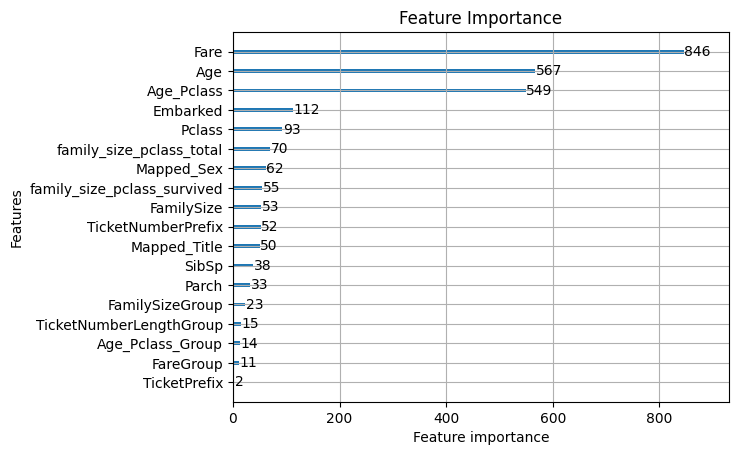

In [ ]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Loading the dataset
file_path = '/content/drive/My Drive/titanic/data/internal_train_data_1226_encoded.csv'
train = pd.read_csv(file_path, low_memory=False)

# Specifying categorical variables
categorical_columns = ['Pclass', 'Embarked', 'Mapped_Title',
                       'TicketPrefix', 'TicketNumber', 'TicketNumberLengthGroup',
                       'TicketNumberPrefix', 'Mapped_Sex', 'AgeGroup',
                       'Age_Pclass_Group', 'FareGroup', 'FamilySizeGroup']
train[categorical_columns] = train[categorical_columns].astype('category')


# Specifying features and target variable
X = train.drop(columns=['Survived'])
y = train['Survived']

# Configuring StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setting up the model
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Creating the LightGBM model
model = lgb.LGBMClassifier(**params)

# Executing cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Displaying cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Visualizing feature importance
model.fit(X, y)

plt.figure(figsize=(10, 6))
lgb.plot_importance(model, importance_type='split', max_num_features=20)
plt.title('Feature Importance')
plt.show()


In [ ]:
!pip install optuna

### Apply Optuna and train with LightGBM

In [ ]:
import pandas as pd
import lightgbm as lgb
import optuna
from sklearn.metrics import accuracy_score

# Loading the dataset
internal_train_data_path = '/content/drive/My Drive/titanic/data/internal_train_data_1226_encoded.csv'
internal_valid_data_path = '/content/drive/My Drive/titanic/data/internal_valid_data_1226_encoded.csv'

train = pd.read_csv(internal_train_data_path, low_memory=False)
valid = pd.read_csv(internal_valid_data_path, low_memory=False)


# Specifying categorical variables
categorical_columns = ['Pclass', 'Embarked', 'Mapped_Title',
                       'TicketPrefix', 'TicketNumber', 'TicketNumberLengthGroup',
                       'TicketNumberPrefix', 'Mapped_Sex', 'AgeGroup',
                       'Age_Pclass_Group', 'FareGroup', 'FamilySizeGroup']

train[categorical_columns] = train[categorical_columns].astype('category')
valid[categorical_columns] = valid[categorical_columns].astype('category')

# Specifying features and target variable
target = 'Survived'
X_train = train.drop(columns=[target])
y_train = train[target]
X_valid = valid.drop(columns=[target])
y_valid = valid[target]

# Create a list of categorical variables
categorical_features = X_train.select_dtypes(include='category').columns.tolist()

# Define the objective function for Optuna
def objective(trial):
    # Specify the range of hyperparameters
    param = {
        'objective': 'binary',
        'metric': 'binary_error',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-3, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-3, 10.0),
        'seed': 42
    }

    # Create the dataset
    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
    valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=categorical_features)

    # Set up callbacks
    callbacks = [
        lgb.early_stopping(stopping_rounds=100, verbose=False),
        lgb.log_evaluation(period=50)
    ]

    # Train the model (apply callbacks)
    model = lgb.train(param, train_data, valid_sets=[valid_data], callbacks=callbacks)

    # Make predictions and calculate accuracy
    y_pred = (model.predict(X_valid) > 0.5).astype(int)
    accuracy = accuracy_score(y_valid, y_pred)

    # Return accuracy
    return accuracy

# Execute Optuna (optimize using accuracy as the evaluation metric)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Display the optimal parameters
print("Best Accuracy Score:", study.best_value)
print("Best Parameters:", study.best_params)


### Model validation
1. Apply the optimal parameters to internal_train_data and retrain the model
2. Evaluate the trained model using internal_valid_data as the final validation

In [ ]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset
internal_train_data_path = '/content/drive/My Drive/titanic/data/internal_train_data_1226_encoded.csv'
internal_valid_data_path = '/content/drive/My Drive/titanic/data/internal_valid_data_1226_encoded.csv'

train = pd.read_csv(internal_train_data_path, low_memory=False)
valid = pd.read_csv(internal_valid_data_path, low_memory=False)

# Specifying categorical variables
categorical_columns = ['Pclass', 'Embarked', 'Mapped_Title',
                       'TicketPrefix', 'TicketNumber', 'TicketNumberLengthGroup',
                       'TicketNumberPrefix', 'Mapped_Sex', 'AgeGroup',
                       'Age_Pclass_Group', 'FareGroup', 'FamilySizeGroup']

train[categorical_columns] = train[categorical_columns].astype('category')
valid[categorical_columns] = valid[categorical_columns].astype('category')

# Specifying features and target variable
target = 'Survived'
X_train = train.drop(columns=[target])
y_train = train[target]
X_valid = valid.drop(columns=[target])
y_valid = valid[target]

# Create a list of categorical variables
categorical_features = X_train.select_dtypes(include='category').columns.tolist()

# Best parameters obtained from Optuna
best_params = {
    'learning_rate': 0.08801208876243177,
    'num_leaves': 254,
    'max_depth': 14,
    'min_data_in_leaf': 26,
    'feature_fraction': 0.9992510166340817,
    'bagging_fraction': 0.8300749073305999,
    'bagging_freq': 1,
    'lambda_l1': 0.04990258996908127,
    'lambda_l2': 0.010165082692243506,
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'seed': 42
}


# Final model training
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
valid_data = lgb.Dataset(X_valid, label=y_valid, categorical_feature=categorical_features)

# Train the model
final_model = lgb.train(
    best_params,
    train_data,
    valid_sets=[valid_data],
    callbacks=[
        lgb.early_stopping(stopping_rounds=100, verbose=True),
        lgb.log_evaluation(period=50)
    ]
)

# Make predictions on the validation data
y_valid_pred = (final_model.predict(X_valid) > 0.5).astype(int)

# Evaluate the performance on the validation data
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))

# Output the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_valid, y_valid_pred))


In [ ]:
# Save the model
model_path = '/content/drive/My Drive/titanic/model/best_lightgbm_model_0129_1.txt'
final_model.save_model(model_path)

print(f"Model saved at: {model_path}")


In [ ]:
# ✅ Loading the dataset
test_path = '/content/drive/My Drive/titanic/data/test_1226_encoded.csv'
test = pd.read_csv(test_path)

test.info()

### Make predictions on the actual test data

In [ ]:
import numpy as np
import pandas as pd
import lightgbm as lgb

# ✅ Path to the saved LightGBM model
lgbm_model_path = '/content/drive/My Drive/titanic/model/best_lightgbm_model_0129_1.txt'

# ✅ Loading the model
lgbm_model = lgb.Booster(model_file=lgbm_model_path)

# ✅ Loading the test data
test_path = '/content/drive/My Drive/titanic/data/test_1226_encoded.csv'
test = pd.read_csv(test_path)

# ✅ Keep PassengerId (for CSV output)
passenger_ids = test['PassengerId']

# ✅ Remove PassengerId
test = test.drop(columns=['PassengerId'])

# ✅ Convert specific columns to categorical type
categorical_columns = ['Pclass', 'Embarked', 'Mapped_Title',
                       'TicketPrefix', 'TicketNumber', 'TicketNumberLengthGroup',
                       'TicketNumberPrefix', 'Mapped_Sex', 'AgeGroup',
                       'Age_Pclass_Group', 'FareGroup', 'FamilySizeGroup']


test[categorical_columns] = test[categorical_columns].astype('category')

# ✅ Predict probabilities directly with LightGBM
lgbm_pred = lgbm_model.predict(test)

# ✅ Convert probabilities to 0 or 1 using a threshold of 0.5 (Survived or Not Survived)
final_test_predictions = (lgbm_pred > 0.5).astype(int)

# ✅ Save the results as a CSV file
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': final_test_predictions
})

submission_path = '/content/drive/My Drive/titanic/submission/lgbm_submission0129_1.csv'
submission.to_csv(submission_path, index=False)

print(f"\nFinal test predictions have been successfully saved to: {submission_path}")



Final test predictions have been successfully saved to: /content/drive/My Drive/titanic/submission/lgbm_submission0129_1.csv


In [ ]:
submission.head(30)

In [ ]:
# Calculate the proportions of survivors and non-survivors
survival_ratio = submission['Survived'].value_counts(normalize=True) * 100

# Display the results
survival_ratio

,proportion
Survived,
0,64.354067
1,35.645933
